In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [31]:
df=pd.read_csv('file:///C:/Users/SR%20COMPUTER/Downloads/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [32]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [33]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

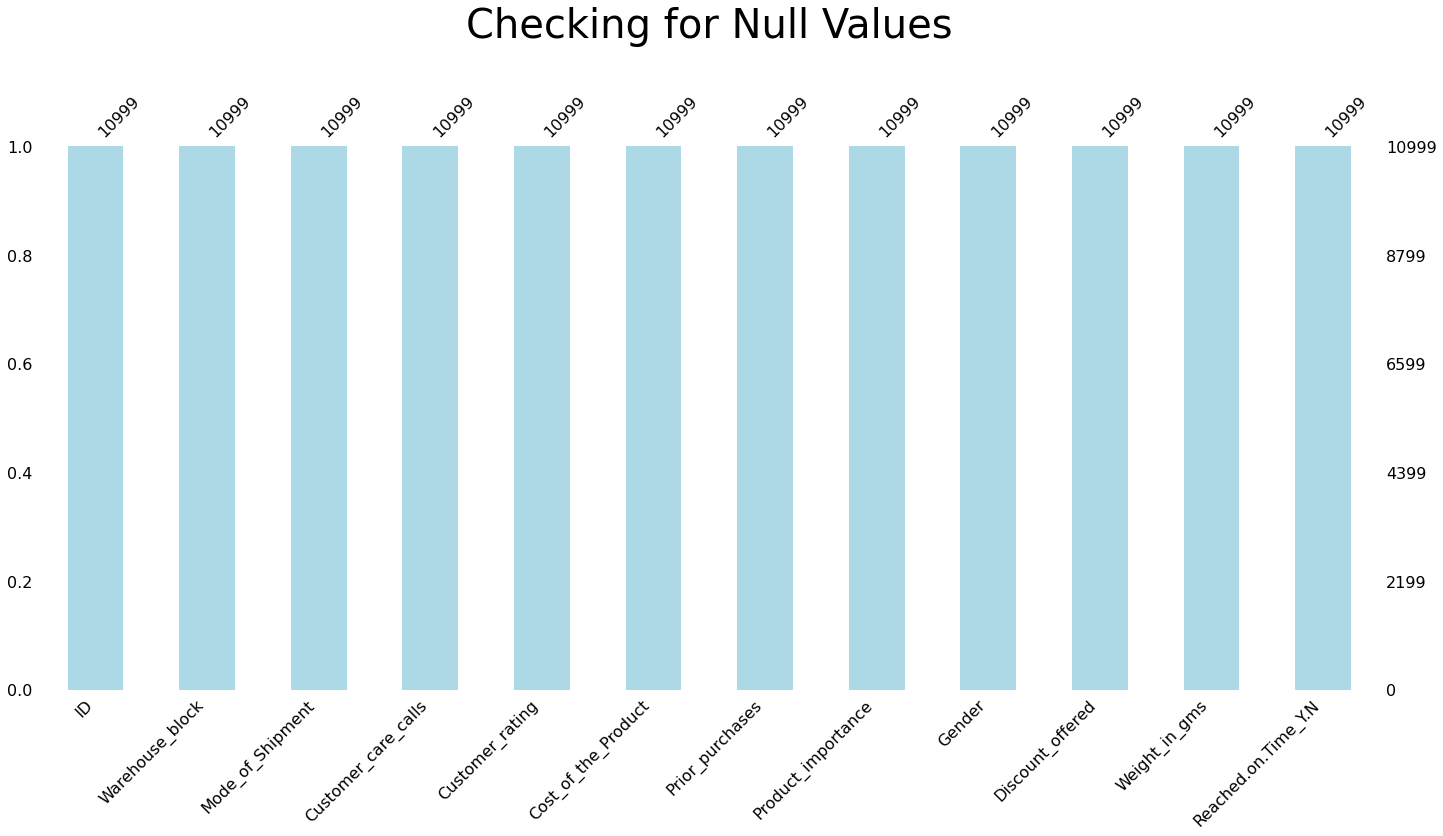

In [34]:
import missingno as msno
msno.bar(df, color = 'lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)
plt.show()

In [35]:
df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [36]:
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [37]:
df.corr()['Reached.on.Time_Y.N'].sort_values()

Weight_in_gms         -0.268793
Cost_of_the_Product   -0.073587
Customer_care_calls   -0.067126
Prior_purchases       -0.055515
Customer_rating        0.013119
Discount_offered       0.397108
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

<AxesSubplot:>

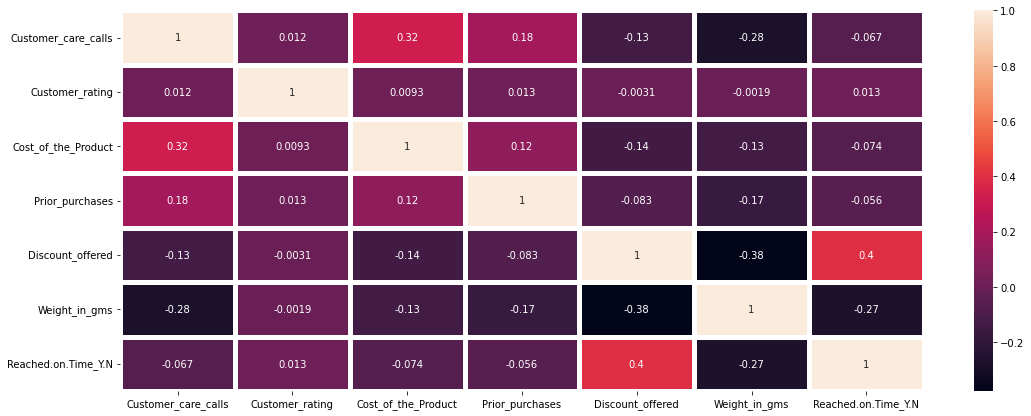

In [38]:
plt.figure(figsize=(18, 7))
sns.heatmap(df.corr(), annot=True, linewidth=5, linecolor='white')

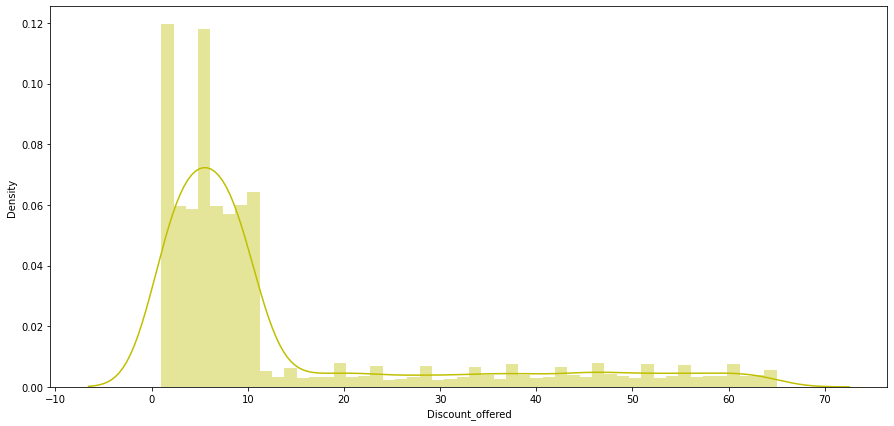

In [39]:
plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Discount_offered'], color = 'y')

plt.show()

In [40]:
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')


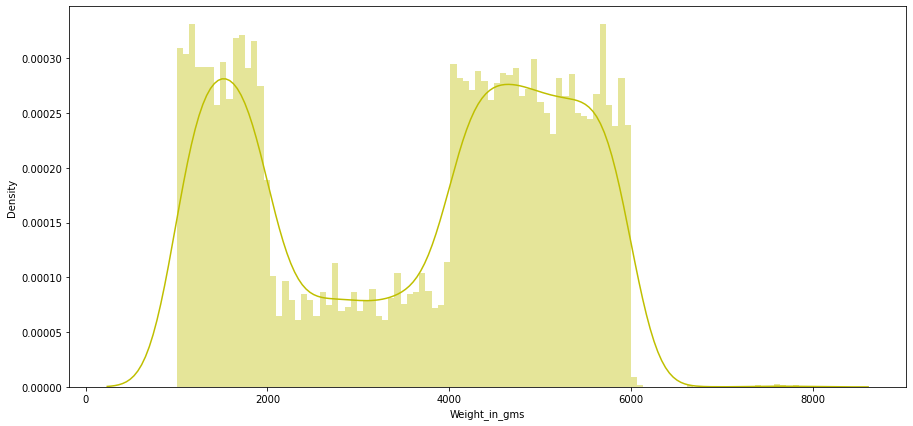

In [41]:
plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Weight_in_gms'], bins = 100, color = 'y')

plt.show()

In [42]:
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

In [43]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender']
criterion_col = 'Reached.on.Time_Y.N'

<AxesSubplot:>

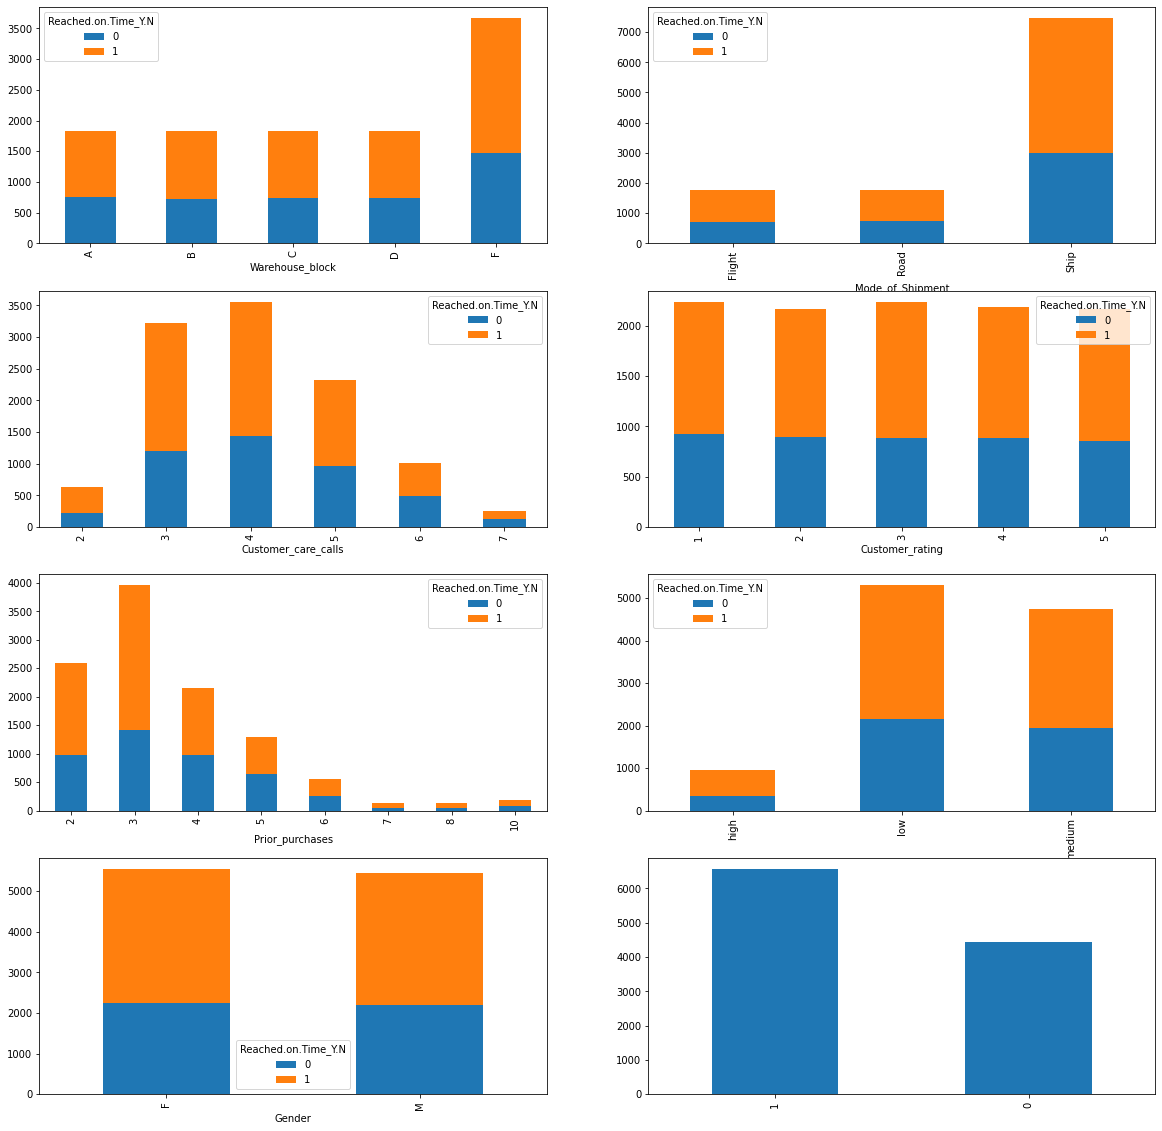

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
for i in range(len(categorical_cols)):
    df_chart = pd.concat([df[[categorical_cols[i]]], df[[criterion_col]]], axis=1)
    df_chart_group = df_chart.groupby([categorical_cols[i], criterion_col])[categorical_cols[i]].count().unstack(criterion_col)
    df_chart_group.plot(kind='bar', stacked=True, ax=axes[i//2, i % 2])

df[criterion_col].value_counts().plot(kind='bar', ax=axes[3, 1])

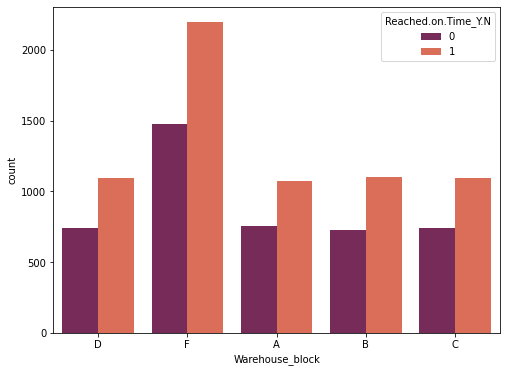

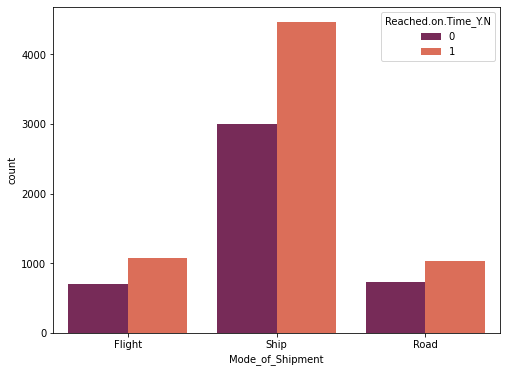

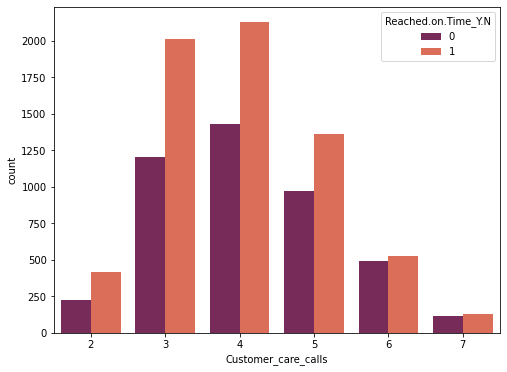

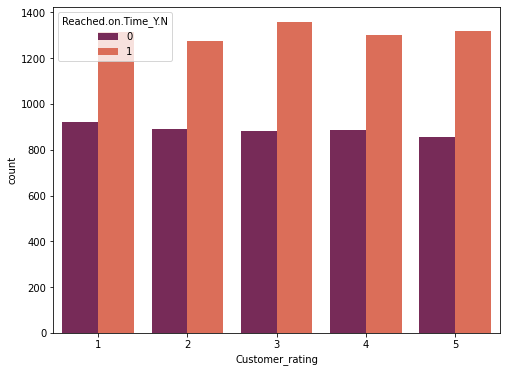

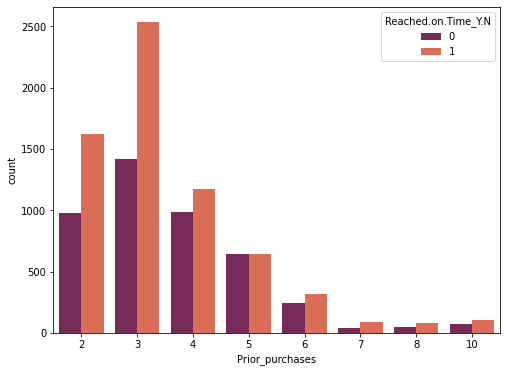

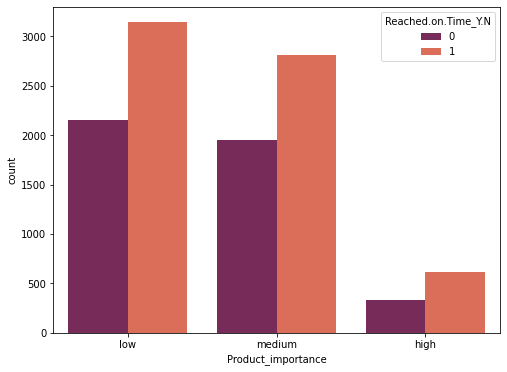

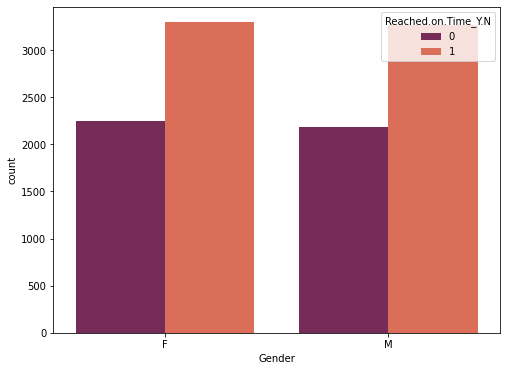

In [45]:
for col in categorical_cols:
    df_count = df[col].value_counts().reset_index()
    df_count.columns = [col, 'value_counts']
    fig = px.pie(df_count, names = col, values = 'value_counts',
                color_discrete_sequence = px.colors.sequential.matter_r, 
                width = 650, height = 400, hole = 0.5, title=col)
    fig.update_traces(textinfo = 'percent+label')
    fig.show()
    plt.figure(figsize = (8, 6))
    sns.countplot(col, hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
    plt.show()

In [46]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [47]:
df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [48]:
df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
dummies=pd.get_dummies(df['Gender'])

In [52]:
df=pd.concat([df,dummies],axis='columns')

In [53]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,F,M
0,D,Flight,4,2,177,3,low,F,44,1233,1,1,0
1,F,Flight,4,5,216,2,low,M,59,3088,1,0,1
2,A,Flight,2,2,183,4,low,M,48,3374,1,0,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1,0,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1,1,0


In [55]:
df.drop('Gender', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,F,M
0,D,Flight,4,2,177,3,low,44,1233,1,1,0
1,F,Flight,4,5,216,2,low,59,3088,1,0,1
2,A,Flight,2,2,183,4,low,48,3374,1,0,1
3,B,Flight,3,3,176,4,medium,10,1177,1,0,1
4,C,Flight,2,2,184,3,medium,46,2484,1,1,0


In [59]:
df=df.rename({"F":"Female"},axis='columns')
df=df.rename({"M":"Male"},axis='columns')

In [60]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Female,Male
0,D,Flight,4,2,177,3,low,44,1233,1,1,0
1,F,Flight,4,5,216,2,low,59,3088,1,0,1
2,A,Flight,2,2,183,4,low,48,3374,1,0,1
3,B,Flight,3,3,176,4,medium,10,1177,1,0,1
4,C,Flight,2,2,184,3,medium,46,2484,1,1,0


In [61]:
dummies=pd.get_dummies(df['Mode_of_Shipment'])

In [62]:
df=pd.concat([df,dummies],axis='columns')

In [63]:
df.drop('Mode_of_Shipment', axis = 1, inplace = True)
df.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Female,Male,Flight,Road,Ship
0,D,4,2,177,3,low,44,1233,1,1,0,1,0,0
1,F,4,5,216,2,low,59,3088,1,0,1,1,0,0
2,A,2,2,183,4,low,48,3374,1,0,1,1,0,0
3,B,3,3,176,4,medium,10,1177,1,0,1,1,0,0
4,C,2,2,184,3,medium,46,2484,1,1,0,1,0,0


In [64]:
dummies=pd.get_dummies(df['Product_importance'])

In [65]:
df=pd.concat([df,dummies],axis='columns')

In [66]:
df.drop('Product_importance', axis = 1, inplace = True)
df.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Female,Male,Flight,Road,Ship,high,low,medium
0,D,4,2,177,3,44,1233,1,1,0,1,0,0,0,1,0
1,F,4,5,216,2,59,3088,1,0,1,1,0,0,0,1,0
2,A,2,2,183,4,48,3374,1,0,1,1,0,0,0,1,0
3,B,3,3,176,4,10,1177,1,0,1,1,0,0,0,0,1
4,C,2,2,184,3,46,2484,1,1,0,1,0,0,0,0,1


In [67]:
df.columns

Index(['Warehouse_block', 'Customer_care_calls', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered',
       'Weight_in_gms', 'Reached.on.Time_Y.N', 'Female', 'Male', 'Flight',
       'Road', 'Ship', 'high', 'low', 'medium'],
      dtype='object')

In [68]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Warehouse_block" is
 F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
-------------------------------------------------
unique values in column "Customer_care_calls" is
 4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64
-------------------------------------------------
unique values in column "Customer_rating" is
 3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64
-------------------------------------------------
unique values in column "Cost_of_the_Product" is
 245    110
257    109
260    106
254    101
264    100
      ... 
107      5
99       5
120      5
96       5
122      4
Name: Cost_of_the_Product, Length: 215, dtype: int64
-------------------------------------------------
unique values in column "Prior_purchases" is
 3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype

In [70]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [69]:
import dtale
dtale.show(df)

In [71]:
object_col

['Warehouse_block']

In [72]:
num_col

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N',
 'Female',
 'Male',
 'Flight',
 'Road',
 'Ship',
 'high',
 'low',
 'medium']

In [73]:
df.shape

(10999, 16)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Customer_care_calls  10999 non-null  int64 
 2   Customer_rating      10999 non-null  int64 
 3   Cost_of_the_Product  10999 non-null  int64 
 4   Prior_purchases      10999 non-null  int64 
 5   Discount_offered     10999 non-null  int64 
 6   Weight_in_gms        10999 non-null  int64 
 7   Reached.on.Time_Y.N  10999 non-null  int64 
 8   Female               10999 non-null  uint8 
 9   Male                 10999 non-null  uint8 
 10  Flight               10999 non-null  uint8 
 11  Road                 10999 non-null  uint8 
 12  Ship                 10999 non-null  uint8 
 13  high                 10999 non-null  uint8 
 14  low                  10999 non-null  uint8 
 15  medium               10999 non-null  uint8 
dtypes: i

In [75]:
df.dtypes

Warehouse_block        object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
Female                  uint8
Male                    uint8
Flight                  uint8
Road                    uint8
Ship                    uint8
high                    uint8
low                     uint8
medium                  uint8
dtype: object

In [76]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,15.0,0.068319,0.289222,-0.276615,-0.034378,0.002545,0.033102,1.0
Customer_rating,15.0,0.069526,0.257481,-0.004752,-0.002189,0.001516,0.010739,1.0
Cost_of_the_Product,15.0,0.072840,0.278580,-0.138312,-0.030090,0.002531,0.028560,1.0
Prior_purchases,15.0,0.067997,0.269708,-0.168213,-0.017158,0.003913,0.016484,1.0
Discount_offered,15.0,0.044933,0.306295,-0.376067,-0.051204,-0.005750,0.011210,1.0
Weight_in_gms,15.0,-0.012841,0.310153,-0.376067,-0.150409,-0.002273,0.003859,1.0
Reached.on.Time_Y.N,15.0,0.063931,0.290717,-0.268793,-0.033307,-0.004689,0.008904,1.0
Female,15.0,-0.001045,0.378080,-1.000000,-0.005917,-0.002775,0.009531,1.0
Male,15.0,0.001045,0.378080,-1.000000,-0.009531,0.002775,0.005917,1.0
Flight,15.0,0.012016,0.320967,-0.637590,-0.008461,-0.001245,0.006517,1.0


In [77]:
df.mean()

Customer_care_calls       4.054459
Customer_rating           2.990545
Cost_of_the_Product     210.196836
Prior_purchases           3.567597
Discount_offered         13.373216
Weight_in_gms          3634.016729
Reached.on.Time_Y.N       0.596691
Female                    0.504137
Male                      0.495863
Flight                    0.161560
Road                      0.160015
Ship                      0.678425
high                      0.086190
low                       0.481589
medium                    0.432221
dtype: float64

In [78]:
df.max()

Warehouse_block           F
Customer_care_calls       7
Customer_rating           5
Cost_of_the_Product     310
Prior_purchases          10
Discount_offered         65
Weight_in_gms          7846
Reached.on.Time_Y.N       1
Female                    1
Male                      1
Flight                    1
Road                      1
Ship                      1
high                      1
low                       1
medium                    1
dtype: object

In [79]:
df.min()

Warehouse_block           A
Customer_care_calls       2
Customer_rating           1
Cost_of_the_Product      96
Prior_purchases           2
Discount_offered          1
Weight_in_gms          1001
Reached.on.Time_Y.N       0
Female                    0
Male                      0
Flight                    0
Road                      0
Ship                      0
high                      0
low                       0
medium                    0
dtype: object

In [80]:
df.skew()

Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
Reached.on.Time_Y.N   -0.394257
Female                -0.016550
Male                   0.016550
Flight                 1.839364
Road                   1.854957
Ship                  -0.764106
high                   2.949409
low                    0.073703
medium                 0.273679
dtype: float64

In [81]:
import sweetviz as sv

In [86]:
data=sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [84]:
from IPython.display import IFrame

In [85]:
IFrame(src='Analyze.html',width=1000,height=600)

<Figure size 1000x800 with 0 Axes>

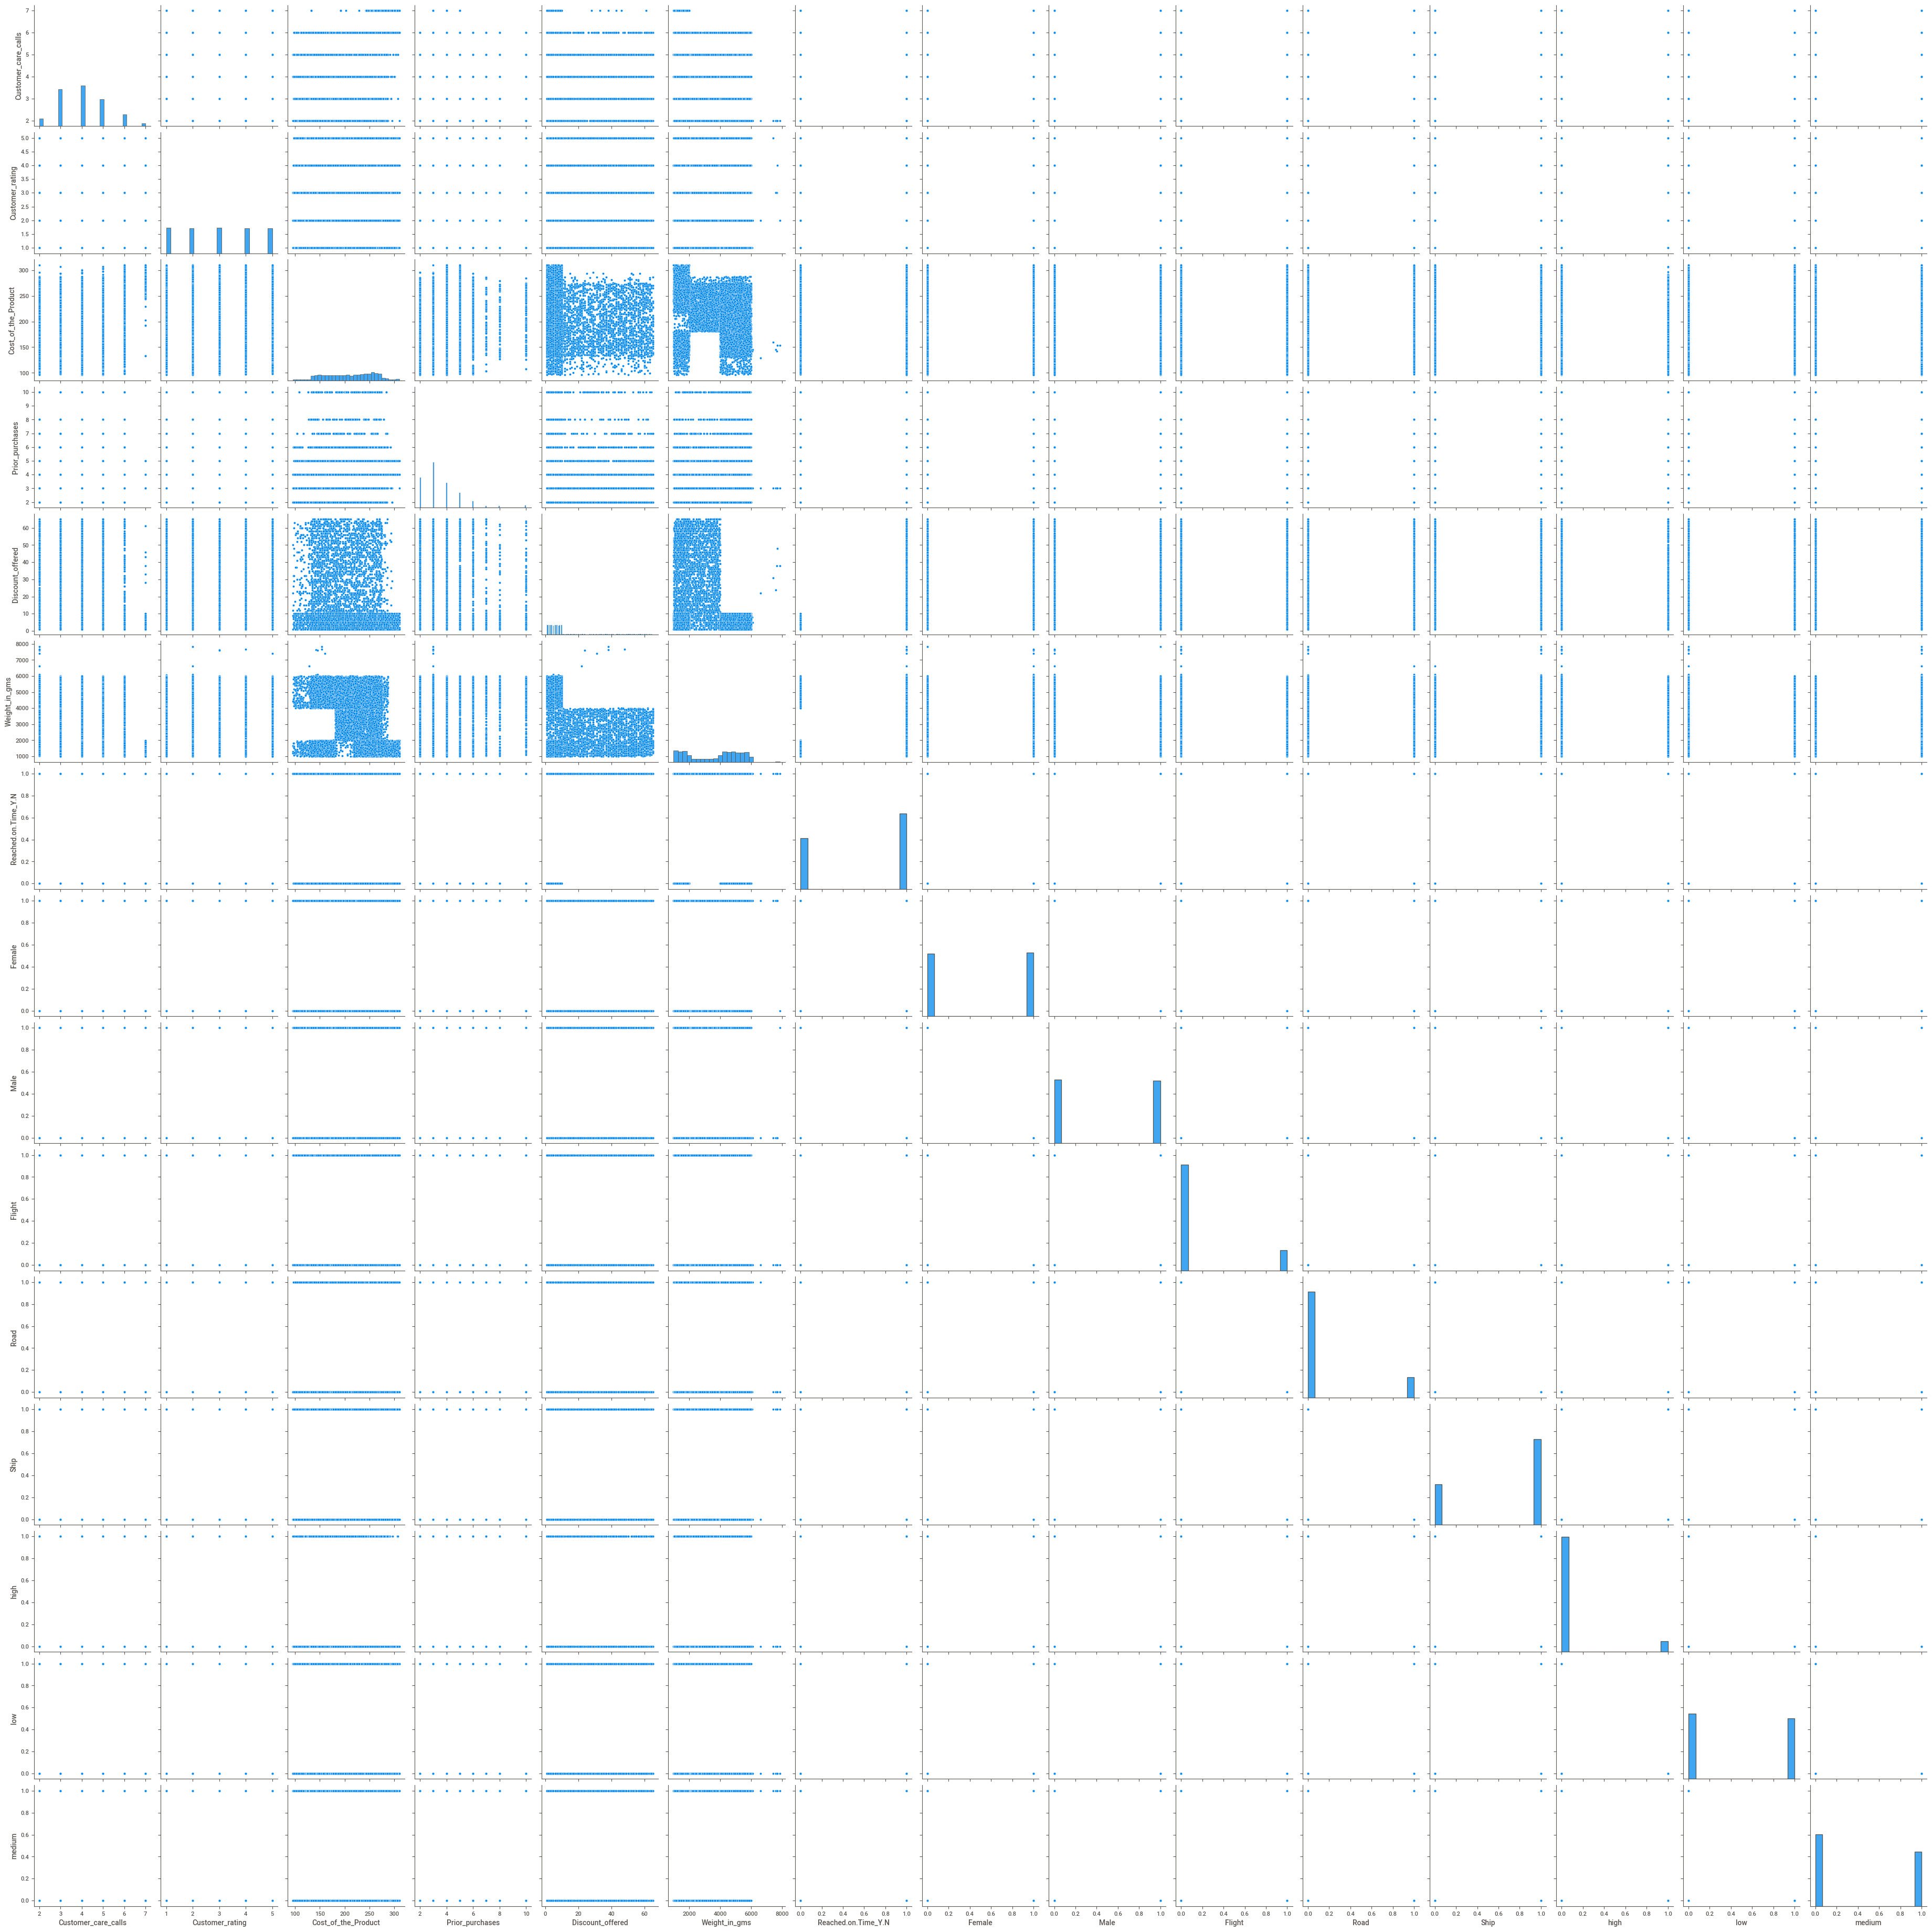

In [89]:
plt.figure(figsize=(10,8))
sns.pairplot(df)

In [91]:
df.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Female,Male,Flight,Road,Ship,high,low,medium
0,D,4,2,177,3,44,1233,1,1,0,1,0,0,0,1,0
1,F,4,5,216,2,59,3088,1,0,1,1,0,0,0,1,0
2,A,2,2,183,4,48,3374,1,0,1,1,0,0,0,1,0
3,B,3,3,176,4,10,1177,1,0,1,1,0,0,0,0,1
4,C,2,2,184,3,46,2484,1,1,0,1,0,0,0,0,1


In [92]:
df.drop('Warehouse_block', axis = 1, inplace = True)
df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Female,Male,Flight,Road,Ship,high,low,medium
0,4,2,177,3,44,1233,1,1,0,1,0,0,0,1,0
1,4,5,216,2,59,3088,1,0,1,1,0,0,0,1,0
2,2,2,183,4,48,3374,1,0,1,1,0,0,0,1,0
3,3,3,176,4,10,1177,1,0,1,1,0,0,0,0,1
4,2,2,184,3,46,2484,1,1,0,1,0,0,0,0,1
